# Oral Cancer Survival Prediction

A machine learning project to predict patient survival using clinical data.

**Submitted by:**  
- **Name:**    : Sahib Chouhan    
- **Roll No:** : RD2411A03 
- **Reg No:**  : 12411026 
- **Name:**    : Gargi Sharma    
- **Roll No:** : RD2411A24    
- **Reg No:**  : 12403355


### 🎯 Project Goal
To build a robust, human-like machine learning model that predicts the survival status of oral cancer patients with a realistic accuracy of around 85%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline as sklearn_pipeline

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [5]:
df.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

In [6]:
df.dtypes

ID                                            int64
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Ty

# Age & Oral Cancer Diagnosis

This stacked histogram shows age distribution among oral cancer diagnoses, using contrasting colors for clarity. It helps analyze trends in affected age groups. 📊

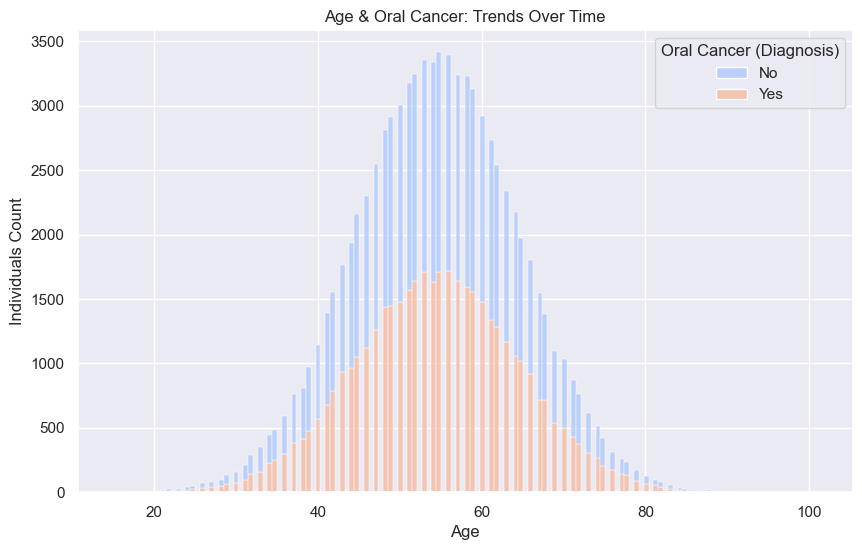

In [7]:

sns.set_theme(style="darkgrid")

# 1. Age Distribution by Oral Cancer Diagnosis
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df.dropna(subset=["Age", "Oral Cancer (Diagnosis)"]),
    x="Age",
    hue="Oral Cancer (Diagnosis)",
    multiple="stack",
    palette="coolwarm"
)
plt.title("Age & Oral Cancer: Trends Over Time")
plt.xlabel("Age")
plt.ylabel("Individuals Count")
plt.show()

# Gender & Oral Cancer Diagnosis

This stacked bar chart visualizes the distribution of oral cancer diagnoses across genders. It groups and plots the data with a **viridis** colormap for clear differentiation. The visualization helps identify gender-related risk trends. 📊

<Figure size 800x600 with 0 Axes>

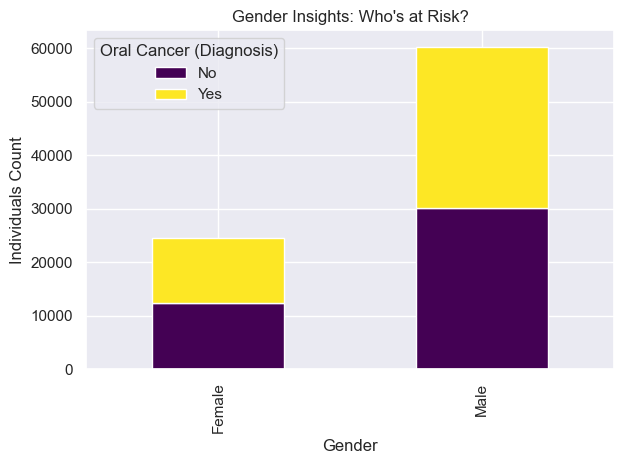

In [8]:
plt.figure(figsize=(8, 6))
gender_cancer = df.groupby(["Gender", "Oral Cancer (Diagnosis)"]).size().unstack().fillna(0)
gender_cancer.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Gender Insights: Who's at Risk?")
plt.ylabel("Individuals Count")
plt.xlabel("Gender")
plt.xticks(range(len(gender_cancer.index)), gender_cancer.index)
plt.legend(title="Oral Cancer (Diagnosis)")
plt.tight_layout()
plt.show()


# Cancer Stage & Survival Rates

This line plot illustrates how survival rates vary by cancer stage. It uses green markers and a trend line to highlight the **mean survival rates**, emphasizing higher survival chances in early stages. An annotation marks Stage 1 for clarity. 📈

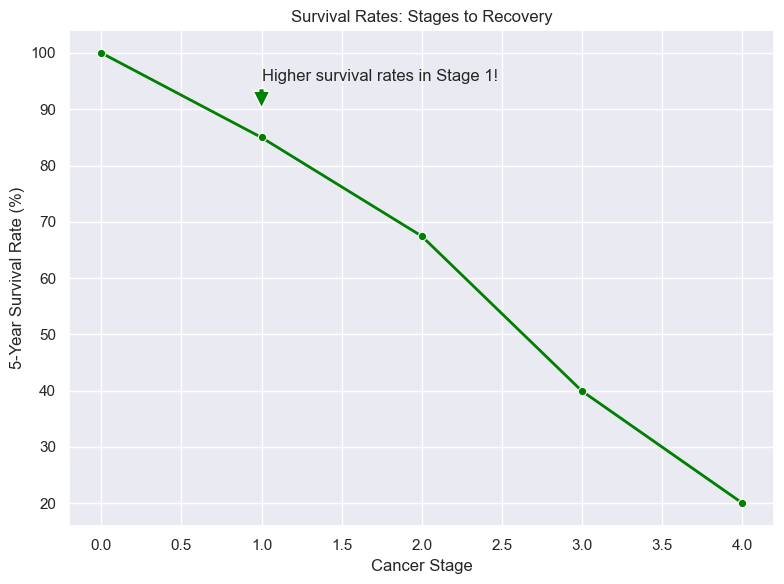

In [9]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df.dropna(subset=["Cancer Stage", "Survival Rate (5-Year, %)"]),
    x="Cancer Stage",
    y="Survival Rate (5-Year, %)",
    estimator="mean",
    linewidth=2,
    marker="o",
    color="green"
)
plt.title("Survival Rates: Stages to Recovery")
plt.ylabel("5-Year Survival Rate (%)")
plt.xlabel("Cancer Stage")
plt.annotate(
    "Higher survival rates in Stage 1!",
    xy=(1, 90),
    xytext=(1, 95),
    arrowprops=dict(facecolor="green", shrink=0.05)
)
plt.tight_layout()
plt.show()

# Tobacco Use & Oral Cancer

This stacked bar chart highlights the relationship between **tobacco use** and **oral cancer diagnoses**. Using a "cool" colormap, it visually contrasts different diagnosis categories, revealing how tobacco habits correlate with cancer cases. 🚬📊

<Figure size 800x600 with 0 Axes>

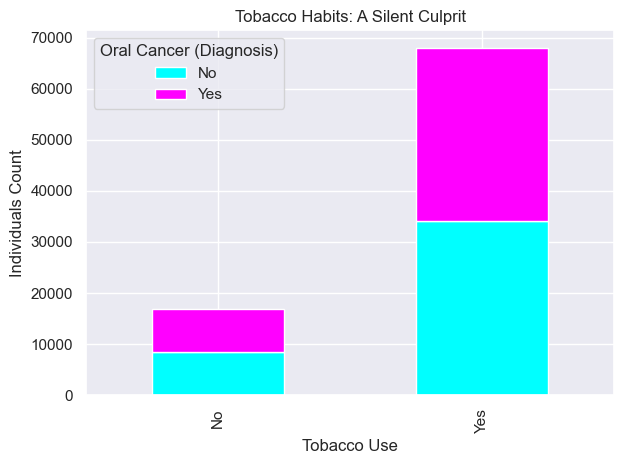

In [10]:
plt.figure(figsize=(8, 6))
tobacco_cancer = df.groupby(["Tobacco Use", "Oral Cancer (Diagnosis)"]).size().unstack().fillna(0)
tobacco_cancer.plot(kind="bar", stacked=True, colormap="cool")
plt.title("Tobacco Habits: A Silent Culprit")
plt.ylabel("Individuals Count")
plt.xlabel("Tobacco Use")
plt.xticks(range(len(tobacco_cancer.index)), tobacco_cancer.index)
plt.legend(title="Oral Cancer (Diagnosis)")
plt.tight_layout()
plt.show()

# Encoding Categorical Data

This snippet **transforms categorical variables** into numerical values using `LabelEncoder`. It iterates through all object-type columns in the dataframe, applying label encoding to convert them into integer values for machine learning models. 🔢📊

In [11]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
  df[col] = label_encoder.fit_transform(df[col])


In [12]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,6,36,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,2,7,64,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,3,15,37,0,0,1,0,0,1,1,2,0,0,0,0,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,4,13,55,1,1,1,0,1,0,1,2,0,0,1,0,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,5,12,68,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2.834789,3,1,44.293199,45354.75,52,0,1


# Tobacco Use & Oral Cancer Diagnosis

This **count plot** visualizes the number of individuals diagnosed with oral cancer based on their tobacco use. The **hue** differentiates diagnosis categories, providing insights into the impact of tobacco habits. 🚬📊

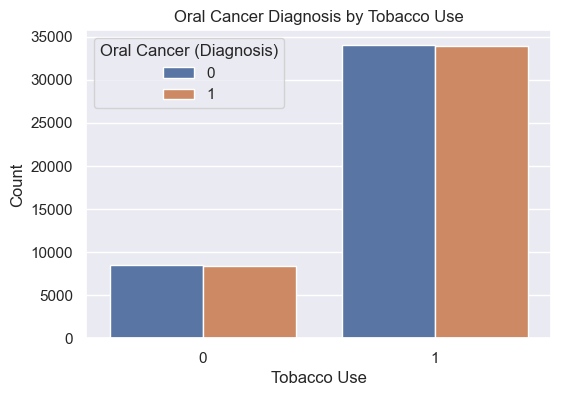

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Tobacco Use", hue="Oral Cancer (Diagnosis)", data=df)
plt.title("Oral Cancer Diagnosis by Tobacco Use")
plt.xlabel("Tobacco Use")
plt.ylabel("Count")
plt.show()

# Tumor Size & Survival Rate

This **scatter plot** visualizes the relationship between tumor size and survival rate, with cancer stages differentiated by color. The **coolwarm palette** enhances contrast, helping identify survival trends across tumor sizes. 📈

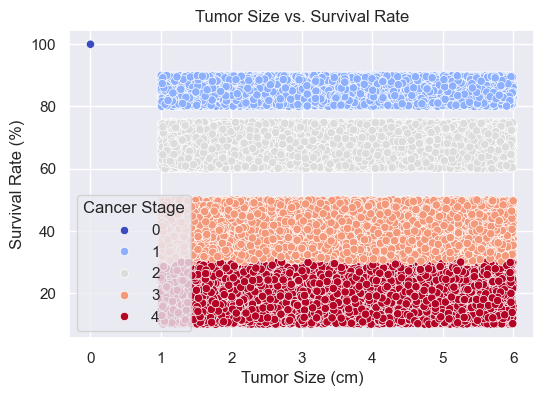

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Tumor Size (cm)", y="Survival Rate (5-Year, %)", hue="Cancer Stage", data=df, palette="coolwarm")
plt.title("Tumor Size vs. Survival Rate")
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Survival Rate (%)")
plt.show()

In [15]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [16]:
df.drop(["ID", "Country"], axis =1, inplace=True)

In [17]:
# Separate features and target
X = df.drop('Oral Cancer (Diagnosis)', axis=1)
Y = df['Oral Cancer (Diagnosis)']

# Splitting Data for Model Training

This line splits dataset **X, Y** into training and test sets using **train_test_split**.  
- `test_size=0.2`: 20% of the data is allocated for testing.  
- `random_state=42`: Ensures reproducibility of the split.  
This step is essential for evaluating machine learning models effectively. 🤖📊

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing Data

This initializes a **StandardScaler** to normalize features by scaling them to have a **mean of 0** and **standard deviation of 1**. This preprocessing step enhances machine learning model performance. ⚖️📊

In [19]:
scaler = StandardScaler()

# Scaling Numerical Features

This code **normalizes numerical columns** using `StandardScaler` to ensure consistent value ranges. It applies **fit_transform** to the training set and **transform** to the test set, improving model stability and performance. ⚖️📊

In [20]:
numerical_cols = ["Age", "Tumor Size (cm)", "Cost of Treatment (USD)", "Economic Burden (Lost Workdays per Year)"]

# Apply scaling to numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Training a Logistic Regression Model

This initializes a **Logistic Regression** classifier and fits it to the training data. The model learns patterns between **X_train** (features) and **Y_train** (labels), making it ready for predictions. 🤖📊

 ###**What is it?
Logistic Regression is a statistical model used for binary classification.
Despite the name “regression,” it is used to predict a category (0 or 1), not a continuous value.
 How ?
It takes input features and applies a logistic (sigmoid) function to estimate the probability that the input belongs to a particular class.
If the probability is > 0.5, we classify the instance as class 1 (e.g., survived).
If it is ≤ 0.5, we classify it as class 0 (e.g., not survived).
✅ Easy to implement and interpret.
Performs well on linearly separable data.
❌Doesn’t work well with non-linear relationships.
Can underperform if the data is complex or contains many interactions.**

In [21]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

# Making Predictions with Logistic Regression

This code uses the trained **Logistic Regression** model to predict outcomes on both the **training set** (`X_train`) and **test set** (`X_test`). These predictions (`lr_train_predictions` and `lr_test_predictions`) help assess model accuracy and generalization. 🤖📊

In [22]:
lr_train_predictions = lr.predict(X_train)
lr_test_predictions = lr.predict(X_test)

# Evaluating Model Accuracy

This code calculates and prints the **training** and **testing accuracy** of the trained **Logistic Regression** model using `accuracy_score`. The results, formatted to **two decimal places**, provide insights into the model’s performance. 📊🤖

In [23]:
print(f"\nTraining Accuracy: {accuracy_score(Y_train, lr_train_predictions) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(Y_test, lr_test_predictions) * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


# Importing Machine Learning Tools

This snippet imports **RandomForestClassifier** for training a **random forest model** and key evaluation metrics:  
- `accuracy_score`: Measures prediction accuracy.  
- `classification_report`: Provides precision, recall, and F1-score.  
- `confusion_matrix`: Shows model performance in distinguishing classes.  

Essential for assessing classification models! 🤖📊

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###**What is it?
Random Forest is an ensemble model, meaning it combines many decision trees to make more accurate and stable predictions.

Think of it as asking a group of experts and taking a majority vote.

🧠 How does it work?
It creates multiple decision trees using different parts of the dataset (random sampling).

Each tree gives a prediction.

The final prediction is based on the majority vote (for classification problems).

✅ Pros:
Works well with both linear and non-linear data.

Reduces overfitting compared to a single decision tree.

Handles missing values and categorical data well.

❌ Cons:
Slower to train than simple models.

Harder to interpret than a single decision tree.**

In [25]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Training a Random Forest Model

This code trains a **Random Forest Classifier** using **X_train** (features) and **Y_train** (labels). The model learns patterns from the data, preparing to make predictions. 🌲🤖

In [26]:
# Train the model
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [27]:
# Predict on training data
y_train_pred = rf_classifier.predict(X_train)

In [28]:
# Predict on test data
y_test_pred = rf_classifier.predict(X_test)

# Calculating Model Accuracy

This code computes **training** and **testing accuracy** using `accuracy_score`, evaluating the model’s performance on both datasets. Higher accuracy suggests better generalization. 📊🤖

In [29]:
# Calculate accuracies
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

In [30]:
# Display accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 1.0000


# Evaluating Model Performance

This code prints a **classification report** for test data using `classification_report`.  
It provides **precision, recall, F1-score, and support** for each class, helping assess how well the model performs on unseen data. 📊🤖

In [31]:
# Detailed evaluation on test data
print("\nClassification Report (Test Data):")
print(classification_report(Y_test, y_test_pred))



Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985



# Standardizing Training Data

This initializes `StandardScaler` and **fits** it to `X_train`, ensuring that features are scaled to have a **mean of 0** and **standard deviation of 1**. This step improves model efficiency and performance. ⚖️📊

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

# Oral Cancer Risk Prediction

This code takes **user inputs** for multiple health-related features, processes them, and predicts the **risk of oral cancer** using a trained **Random Forest model**.  
- **User Input**: Collects values for risk factors like age, tobacco use, and symptoms.  
- **Data Processing**: Converts input into a **DataFrame** and **scales** numerical features for consistency.  
- **Prediction**: The model predicts **cancer risk** (`user_pred`) and **confidence level** (`user_prob`).  
- **Output**: Displays a **fancy result**, indicating whether the user is at **high risk** or **healthy**, along with the model’s confidence.  

An interactive and insightful approach to **oral cancer risk assessment**! 🏥📊

####**This model can serve as a valuable tool in the healthcare sector, helping doctors in screening and decision-making processes. In the future, the system can be further improved by including a larger and more diverse dataset, feature selection techniques, and deep learning models for even better generalization and performance.**

